In [3]:
import pandas as pd

# Cargar el dataset
file_path = "data/Adaptive_AI_Feedback_Dataset.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura
df.head()


,user_id,session_id,timestamp,difficulty_adjustment,hint_frequency,challenge_rating,player_performance,adaptation_reason,reinforcement_type
0,1,1,8:33:30.000 PM,-1,2,10,31,rendimiento excepcional,positivo
1,2,2,12:15:38.000 AM,1,6,6,66,rendimiento alto,positivo
2,3,3,12:56:17.000 PM,-1,5,3,53,rendimiento estable,negativo
3,4,4,8:53:30.000 AM,-1,5,8,0,errores repetidos,negativo
4,5,5,5:49:41.000 AM,1,0,5,44,tiempo de reaccion alto,positivo


In [4]:
from sklearn.preprocessing import LabelEncoder

# Convertir la columna timestamp a formato de tiempo
df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')

# Codificar variables categóricas
label_encoders = {}
categorical_cols = ["adaptation_reason", "reinforcement_type"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convertir a string antes de codificar
    label_encoders[col] = le  # Guardar el codificador para referencia

# Verificar la estructura después de la transformación
df.head()


C:\Users\leodo\AppData\Local\Temp\ipykernel_17372\3806529842.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')


,user_id,session_id,timestamp,difficulty_adjustment,hint_frequency,challenge_rating,player_performance,adaptation_reason,reinforcement_type
0,1,1,2025-03-26 20:33:30,-1,2,10,31,3,0
1,2,2,2025-03-26 00:15:38,1,6,6,66,1,0
2,3,3,2025-03-26 12:56:17,-1,5,3,53,2,1
3,4,4,2025-03-26 08:53:30,-1,5,8,0,0,1
4,5,5,2025-03-26 05:49:41,1,0,5,44,4,0


# aplicar LDA (Latent Dirichlet Allocation) para detectar patrones latentes en los datos y visualizar las relaciones entre las variables. 

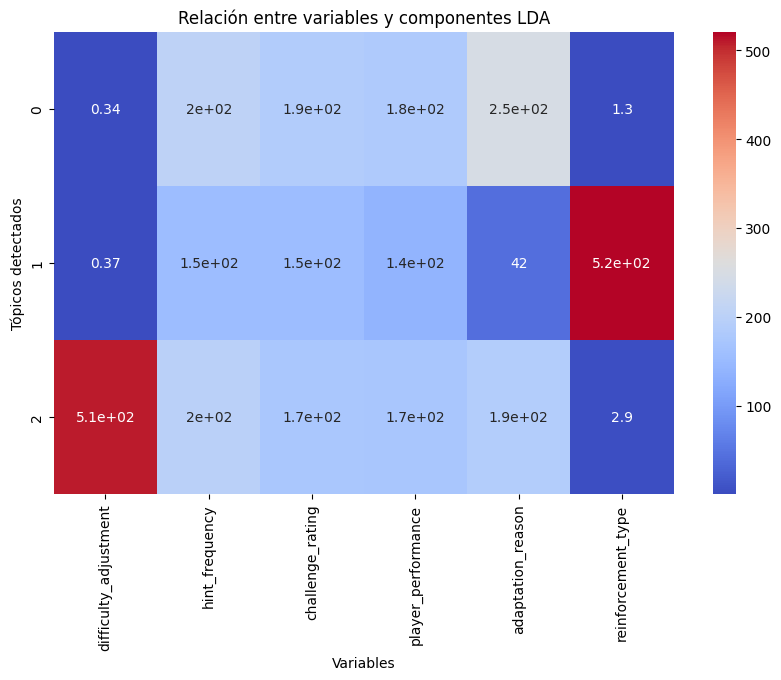

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar las características para que estén en un rango no negativo
scaler = MinMaxScaler()
lda_features_scaled = scaler.fit_transform(lda_features)

# Aplicar LDA nuevamente
lda_transformed = lda.fit_transform(lda_features_scaled)

# Crear un DataFrame con los resultados
lda_df = pd.DataFrame(lda_transformed, columns=["Topic 1", "Topic 2", "Topic 3"])

# Agregar los resultados al dataset original para analizar
df_lda = pd.concat([df, lda_df], axis=1)

# Visualizar la relación entre los tópicos y las variables originales
plt.figure(figsize=(10, 6))
sns.heatmap(lda.components_, cmap="coolwarm", annot=True, xticklabels=lda_features.columns)
plt.title("Relación entre variables y componentes LDA")
plt.xlabel("Variables")
plt.ylabel("Tópicos detectados")
plt.show()


ds

LDA para DataSet 1


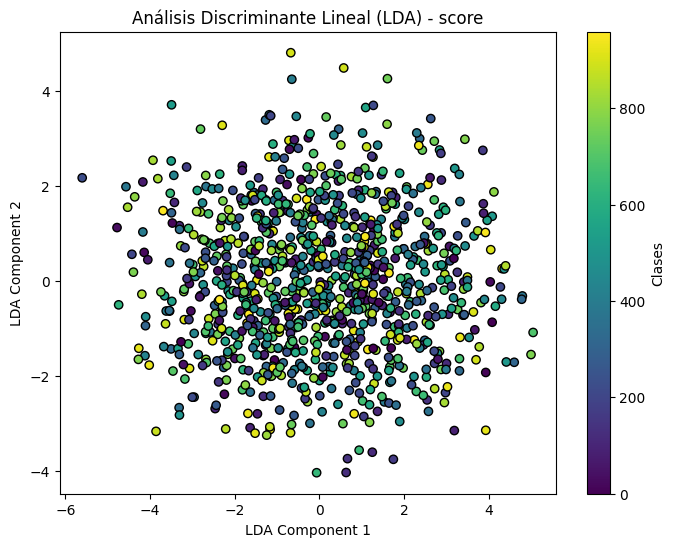

LDA para DataSet 2


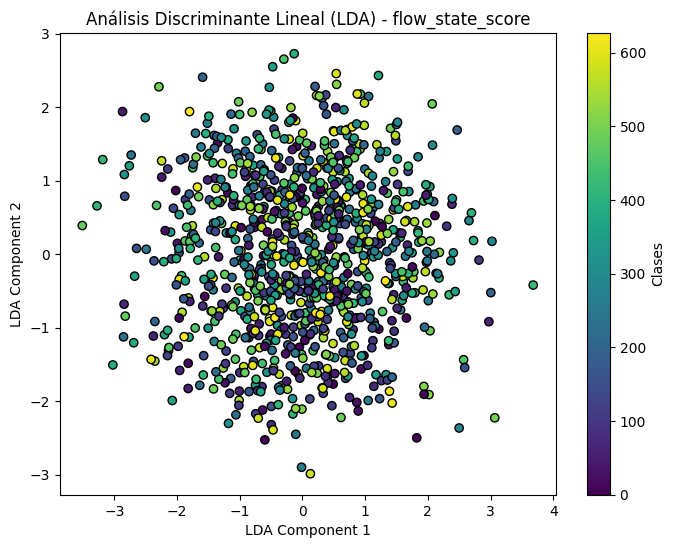

LDA para Adaptive AI Feedback Dataset


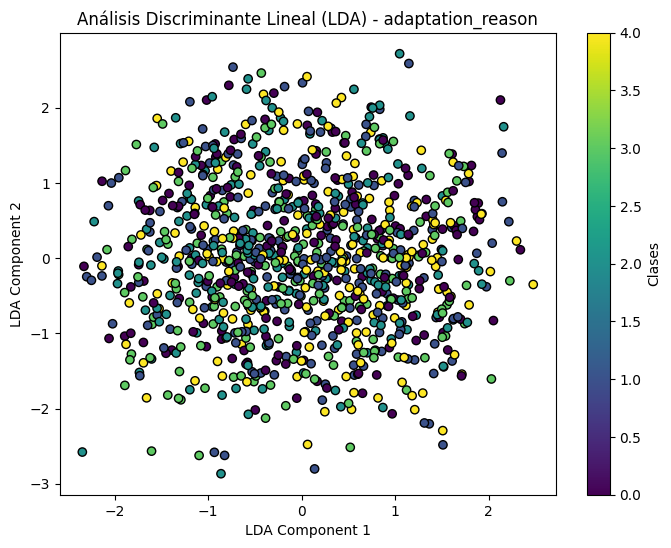

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Cargar los datasets
dataset1 = pd.read_csv('data/DataSet_1_Values.csv')
dataset2 = pd.read_csv('data/Dataset_2.csv')
adaptive_ai = pd.read_csv('data/Adaptive_AI_Feedback_Dataset.csv')

# Función para aplicar LDA
def apply_lda(data, target_column):
    # Eliminar filas con valores nulos
    data = data.dropna()
    
    # Separar variables de entrada y salida
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Codificar variables categóricas si existen
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col])
    
    # Estandarizar las variables numéricas
    X = StandardScaler().fit_transform(X)
    
    # Codificar la variable objetivo
    y = LabelEncoder().fit_transform(y)
    
    # Aplicar LDA
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit_transform(X, y)
    
    # Visualización
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='viridis', edgecolor='k')
    plt.colorbar(scatter, label='Clases')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.title(f'Análisis Discriminante Lineal (LDA) - {target_column}')
    plt.show()
    
    return X_lda

# Aplicar LDA a los datasets con una variable objetivo
print("LDA para DataSet 1")
lda_dataset1 = apply_lda(dataset1, 'score')  # Cambia 'score' por la variable objetivo correcta

print("LDA para DataSet 2")
lda_dataset2 = apply_lda(dataset2, 'flow_state_score')  # Cambia por la variable adecuada

print("LDA para Adaptive AI Feedback Dataset")
lda_adaptive_ai = apply_lda(adaptive_ai, 'adaptation_reason')  # Ajusta según la estructura del dataset